# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.


Dataset saya dapat dari github, saya lupa URL exact datanya karena ini saya ambil dari project lama saya

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning

In [14]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import os
import warnings
warnings.filterwarnings('ignore')

# For text preprocessing
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 100)

print('Libraries imported successfully!')

Libraries imported successfully!


# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

## Ini adalah dataset yang digunakan untuk eksperimen ini, berupa SMS spam dan ham.

In [15]:
# Load Data setnya
df = pd.read_csv('C:/Users/PC/Documents/Project_akhir_MLFlow/Eksperimen_SML_Yudhistira_Paksi/indo_spam_raw.csv')

# Display informasi umum
print('Dataset loaded successfully!')
print(f'Dataset shape: {df.shape}')
print(f'Columns: {list(df.columns)}')
print('\nFirst 5 rows:')
df.head()

Dataset loaded successfully!
Dataset shape: (2045, 2)
Columns: ['Kategori', 'Pesan']

First 5 rows:


,Kategori,Pesan
0,Spam,(Bank Granit menerbitkan Strong-Buy) PILIHAN EKSPLOSIF UNTUK ANGGOTA KAMI ***** HINGGA LEBIH DAR...
1,ham,"(Saya harus menambahkan bahwa saya tidak terlalu peduli dan jika Anda tidak bisa, saya setidakny..."
2,ham,"(Yang mengatakan, bisakah Anda mengirim sms kepadanya sekali lagi?)"
3,Spam,* GRATIS * POLIFONIK RINGTONE Teks SUPER ke 87131 untuk mendapatkan Anda FREE POLY TONE minggu i...
4,Spam,**PESAN GRATIS**Terima kasih telah menggunakan Layanan Berlangganan Lelang. 18 . 150p/MSGRCVD 2 ...


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

Cek Info Dataset, duplikat data dan missing values

In [16]:

print('=== Dataset Information ===')
df.info()
print('\n=== Statistical Summary ===')
print(df.describe())
print('\n=== Missing Values ===')
print(df.isnull().sum())
print(f'\n=== Duplicate Rows: {df.duplicated().sum()} ===')

=== Dataset Information ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2045 entries, 0 to 2044
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kategori  2045 non-null   object
 1   Pesan     2045 non-null   object
dtypes: object(2)
memory usage: 32.1+ KB

=== Statistical Summary ===
       Kategori                            Pesan
count      2045                             2045
unique        2                             1898
top         ham  Maaf, saya akan menelepon nanti
freq       1302                                9

=== Missing Values ===
Kategori    0
Pesan       0
dtype: int64

=== Duplicate Rows: 147 ===


Cek distribusi kelas dan visualisasinya


=== Class Distribution ===
Kategori
ham     1302
Spam     743
Name: count, dtype: int64


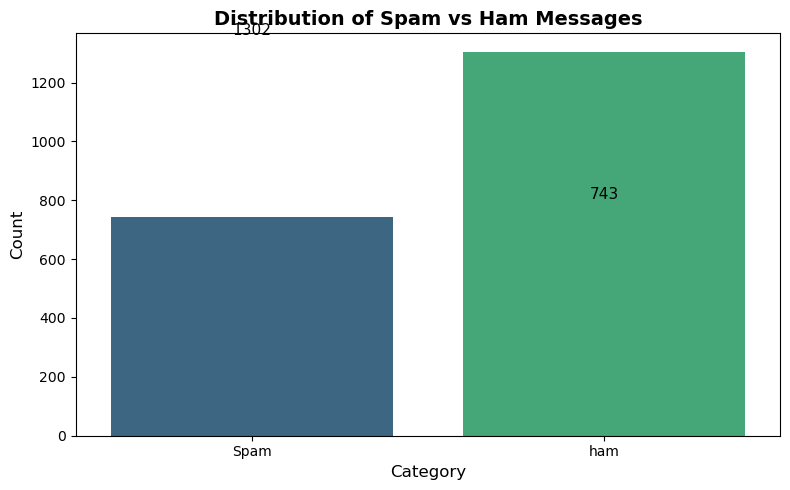

In [17]:
print('\n=== Class Distribution ===')
print(df['Kategori'].value_counts())

# Visualisasi
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Kategori', palette='viridis')
plt.title('Distribution of Spam vs Ham Messages', fontsize=14, fontweight='bold')
plt.xlabel('Category', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=0)
for i, v in enumerate(df['Kategori'].value_counts()):
    plt.text(i, v + 50, str(v), ha='center', va='bottom', fontsize=11)
plt.tight_layout()
plt.show()



Cek analysis seperti panjangnya messange, melakukan visualisasi dan word count


=== Message Length Statistics ===


         message_length                                                    \
                  count        mean        std   min    25%    50%    75%   
Kategori                                                                    
Spam              743.0  161.157470  35.616492  13.0  151.0  170.0  183.0   
ham              1302.0   87.028418  67.566996   3.0   41.0   64.0  117.0   

                 word_count                                               \
             max      count       mean        std  min   25%   50%   75%   
Kategori                                                                   
Spam       241.0      743.0  24.780619   6.200517  2.0  22.0  26.0  29.0   
ham       1046.0     1302.0  14.003072  10.577266  1.0   7.0  11.0  19.0   

                 
            max  
Kategori         
Spam       39.0  
ham       156.0  


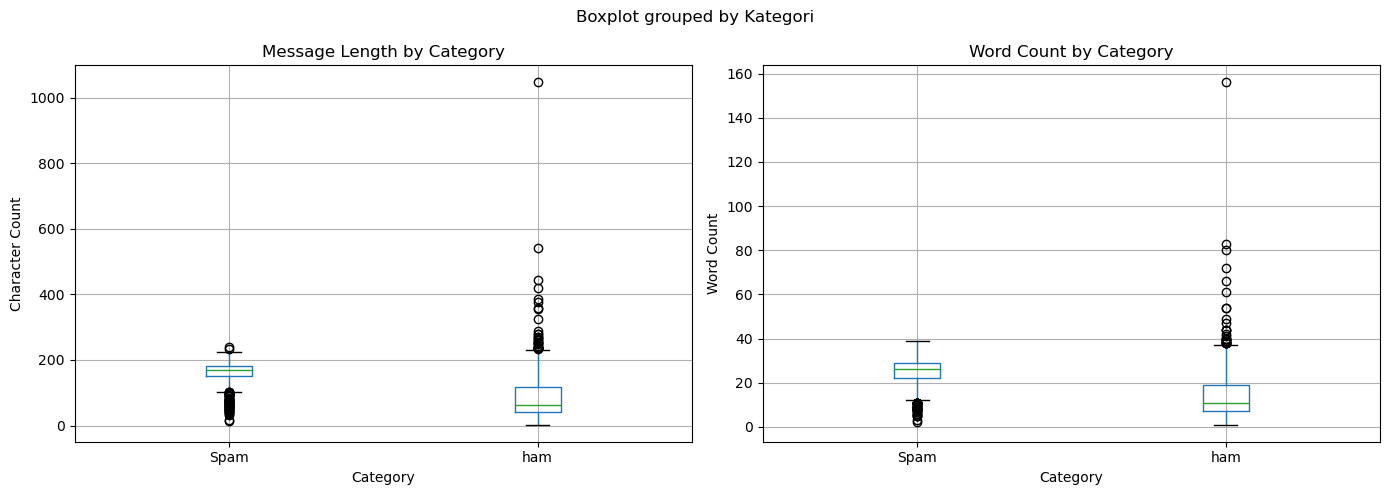


=== Sample Spam Messages ===
['(Bank Granit menerbitkan Strong-Buy) PILIHAN EKSPLOSIF UNTUK ANGGOTA KAMI ***** HINGGA LEBIH DARI 300% **** Nasdaq Symbol CDGT Itu adalah $ 5,00 per ..'
 '* GRATIS * POLIFONIK RINGTONE Teks SUPER ke 87131 untuk mendapatkan Anda FREE POLY TONE minggu ini sekarang! 16 SN PoBox202 NR31 7ZS berlangganan 450pw'
 '**PESAN GRATIS**Terima kasih telah menggunakan Layanan Berlangganan Lelang. 18 . 150p/MSGRCVD 2 Lewati txt Lelang OUT. 2 Berhenti berlangganan txt STOP CustomerCare 08718726270']

=== Sample Ham Messages ===
['(Saya harus menambahkan bahwa saya tidak terlalu peduli dan jika Anda tidak bisa, saya setidaknya bisa membuat pria ini bercinta tapi hei, uang Anda jika Anda menginginkannya)'
 '(Yang mengatakan, bisakah Anda mengirim sms kepadanya sekali lagi?)'
 '1) Pergi untuk menulis pesan 2) Pasang mode Kamus 3) Tutupi layar dengan tangan, 4) Tekan < #> . 5) Lepaskan tangan Anda dengan lembut .. Ini menarik..:)']


In [18]:
# Analisa panjangnya pesan
df['message_length'] = df['Pesan'].apply(lambda x: len(str(x)))
df['word_count'] = df['Pesan'].apply(lambda x: len(str(x).split()))

print('\n=== Message Length Statistics ===')
print(df.groupby('Kategori')[['message_length', 'word_count']].describe())

# Visualisasi dari distribusi panjangnya pesan
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Visualisasi dari panjangnya pesan
df.boxplot(column='message_length', by='Kategori', ax=axes[0])
axes[0].set_title('Message Length by Category')
axes[0].set_xlabel('Category')
axes[0].set_ylabel('Character Count')
plt.sca(axes[0])
plt.xticks(rotation=0)

# Visualisasi Word count
df.boxplot(column='word_count', by='Kategori', ax=axes[1])
axes[1].set_title('Word Count by Category')
axes[1].set_xlabel('Category')
axes[1].set_ylabel('Word Count')
plt.sca(axes[1])
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

# Sample messages
print('\n=== Sample Spam Messages ===')
print(df[df['Kategori'] == 'Spam']['Pesan'].head(3).values)
print('\n=== Sample Ham Messages ===')
print(df[df['Kategori'] == 'ham']['Pesan'].head(3).values)

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

1. Menangani Data Kosong

In [19]:
# 2. Handle missing values
df = df.dropna()
print(f'After removing missing values: {len(df)} rows')

After removing missing values: 2045 rows


2. Menghapus Data Duplikat

In [20]:
print(f'Before removing duplicates: {len(df)} rows')
df = df.drop_duplicates()
print(f'After removing duplicates: {len(df)} rows')

Before removing duplicates: 2045 rows
After removing duplicates: 1898 rows


3. Dilakukan data encoding (kategorical) dan standarisasi fitur

In [21]:
def clean_text(text):
    # Convert ke lowercase
    text = str(text).lower()
    
    # hapus urls
    text = re.sub(r'http\S+|www\S+', '', text)
    
    # hapus email addresses
    text = re.sub(r'\S+@\S+', '', text)
    
    # hapus phone numbers
    text = re.sub(r'\d{5,}', '', text)
    
    # hapus special characters dan digits
    text = re.sub(r'[^a-zA-Z\s]', ' ', text)
    
    # hapus whitespace  
    text = re.sub(r'\s+', ' ', text).strip()
    
    return text

# apply text cleaning
print('\nCleaning text...')
df['cleaned_text'] = df['Pesan'].apply(clean_text)

# sesudah dan sebelum text cleaning
print('\n=== Text Cleaning Examples ===')
for i in range(3):
    print(f'\nOriginal: {df.iloc[i]["Pesan"]}')
    print(f'Cleaned: {df.iloc[i]["cleaned_text"]}')


Cleaning text...

=== Text Cleaning Examples ===

Original: (Bank Granit menerbitkan Strong-Buy) PILIHAN EKSPLOSIF UNTUK ANGGOTA KAMI ***** HINGGA LEBIH DARI 300% **** Nasdaq Symbol CDGT Itu adalah $ 5,00 per ..
Cleaned: bank granit menerbitkan strong buy pilihan eksplosif untuk anggota kami hingga lebih dari nasdaq symbol cdgt itu adalah per

Original: (Saya harus menambahkan bahwa saya tidak terlalu peduli dan jika Anda tidak bisa, saya setidaknya bisa membuat pria ini bercinta tapi hei, uang Anda jika Anda menginginkannya)
Cleaned: saya harus menambahkan bahwa saya tidak terlalu peduli dan jika anda tidak bisa saya setidaknya bisa membuat pria ini bercinta tapi hei uang anda jika anda menginginkannya

Original: (Yang mengatakan, bisakah Anda mengirim sms kepadanya sekali lagi?)
Cleaned: yang mengatakan bisakah anda mengirim sms kepadanya sekali lagi


4. Encode Target Variable   

In [22]:

df['label'] = df['Kategori'].map({'Spam': 1, 'ham': 0})

5. Data Binning

Split data ke training dan testing

In [23]:
X = df['cleaned_text']
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f'\n=== Train-Test Split ===')
print(f'Training set: {len(X_train)} samples')
print(f'Testing set: {len(X_test)} samples')



=== Train-Test Split ===
Training set: 1518 samples
Testing set: 380 samples


Vektorisasi

In [24]:
print('\nPerforming TF-IDF vectorization...')
vectorizer = TfidfVectorizer(max_features=3000, min_df=2, max_df=0.8)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

print(f'TF-IDF matrix shape (train): {X_train_tfidf.shape}')
print(f'TF-IDF matrix shape (test): {X_test_tfidf.shape}')



Performing TF-IDF vectorization...
TF-IDF matrix shape (train): (1518, 1786)
TF-IDF matrix shape (test): (380, 1786)


Simpan data yang sudah dilakukan preprocessing

In [25]:
os.makedirs('preprocessing', exist_ok=True)

In [26]:
preprocessed_df = df[['Kategori', 'Pesan', 'cleaned_text', 'label']].copy()
preprocessed_df.to_csv('preprocessing/indo_spam_preprocessing.csv', index=False)
print('\nPreprocessed data saved to: preprocessing/indo_spam_preprocessing.csv')


Preprocessed data saved to: preprocessing/indo_spam_preprocessing.csv


6. Validasi model untuk training cepat, prediksi, evaluasi serta Confusion Matrix


=== Training a Quick Naive Bayes Model for Validation ===

Accuracy: 0.9579

Classification Report:
              precision    recall  f1-score   support

         Ham       0.94      1.00      0.97       252
        Spam       0.99      0.88      0.93       128

    accuracy                           0.96       380
   macro avg       0.97      0.94      0.95       380
weighted avg       0.96      0.96      0.96       380



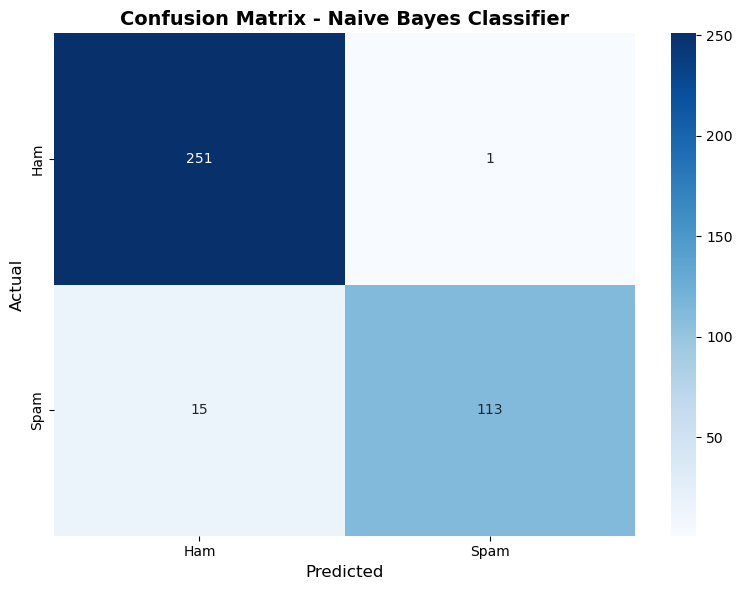


=== Data Preprocessing Completed! ===


In [27]:
print('\n=== Training a Quick Naive Bayes Model for Validation ===')
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)

# Prediksi
y_pred = nb_model.predict(X_test_tfidf)

# Evaluasi
print(f'\nAccuracy: {accuracy_score(y_test, y_pred):.4f}')
print('\nClassification Report:')
print(classification_report(y_test, y_pred, target_names=['Ham', 'Spam']))

# Confusion Matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.title('Confusion Matrix - Naive Bayes Classifier', fontsize=14, fontweight='bold')
plt.ylabel('Actual', fontsize=12)
plt.xlabel('Predicted', fontsize=12)
plt.tight_layout()
plt.show()

print('\n=== Data Preprocessing Completed! ===')